In [17]:
import pandas as pd
import os
os.getcwd()
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

##### Loading the dataset
Changing to working directory and reading the file using pandas read_csv. 
The file is ; delimited and contains a header

In [2]:
os.chdir('E:\\Datasets')
os.listdir()

['airbnb-listings_netherlands.csv',
 'creditcard.csv',
 'F1',
 'fete-de-la-musique-2019.json',
 'housing',
 'irissql.bak',
 'model.pkl',
 'movies',
 'WideWorldImporters-Full.bak']

In [3]:
path = os.path.join(os.listdir()[0])
airbnb = pd.read_csv(path,delimiter=';',header=0) 

##### Inspecting the dataset
The file contains 89 columns with 15,180 rows. 

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15181 entries, 0 to 15180
Data columns (total 89 columns):
ID                                15181 non-null int64
Listing Url                       15181 non-null object
Scrape ID                         15181 non-null int64
Last Scraped                      15181 non-null object
Name                              15181 non-null object
Summary                           14748 non-null object
Space                             11289 non-null object
Description                       15181 non-null object
Experiences Offered               15181 non-null object
Neighborhood Overview             10022 non-null object
Notes                             6506 non-null object
Transit                           10210 non-null object
Access                            9409 non-null object
Interaction                       9115 non-null object
House Rules                       10572 non-null object
Thumbnail Url                     11336 non-null object


Its obvious from the data that there are few columns which have all Null values. Let's remove them as it won't help in anyway. 

In [5]:
airbnb.dropna(how='all',axis=1,inplace=True) # removes all the columns having null values

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15181 entries, 0 to 15180
Data columns (total 85 columns):
ID                                15181 non-null int64
Listing Url                       15181 non-null object
Scrape ID                         15181 non-null int64
Last Scraped                      15181 non-null object
Name                              15181 non-null object
Summary                           14748 non-null object
Space                             11289 non-null object
Description                       15181 non-null object
Experiences Offered               15181 non-null object
Neighborhood Overview             10022 non-null object
Notes                             6506 non-null object
Transit                           10210 non-null object
Access                            9409 non-null object
Interaction                       9115 non-null object
House Rules                       10572 non-null object
Thumbnail Url                     11336 non-null object


In [7]:
airbnb[airbnb.duplicated() == True] # no rows are duplicates 

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features


In [8]:
col = {i:airbnb.columns[i] for i in range(len(airbnb.columns))}

In [9]:
airbnb['ID'].nunique()

15181

In [10]:
col

{0: 'ID',
 1: 'Listing Url',
 2: 'Scrape ID',
 3: 'Last Scraped',
 4: 'Name',
 5: 'Summary',
 6: 'Space',
 7: 'Description',
 8: 'Experiences Offered',
 9: 'Neighborhood Overview',
 10: 'Notes',
 11: 'Transit',
 12: 'Access',
 13: 'Interaction',
 14: 'House Rules',
 15: 'Thumbnail Url',
 16: 'Medium Url',
 17: 'Picture Url',
 18: 'XL Picture Url',
 19: 'Host ID',
 20: 'Host URL',
 21: 'Host Name',
 22: 'Host Since',
 23: 'Host Location',
 24: 'Host About',
 25: 'Host Response Time',
 26: 'Host Response Rate',
 27: 'Host Thumbnail Url',
 28: 'Host Picture Url',
 29: 'Host Neighbourhood',
 30: 'Host Listings Count',
 31: 'Host Total Listings Count',
 32: 'Host Verifications',
 33: 'Street',
 34: 'Neighbourhood',
 35: 'Neighbourhood Cleansed',
 36: 'City',
 37: 'State',
 38: 'Zipcode',
 39: 'Market',
 40: 'Smart Location',
 41: 'Country Code',
 42: 'Country',
 43: 'Latitude',
 44: 'Longitude',
 45: 'Property Type',
 46: 'Room Type',
 47: 'Accommodates',
 48: 'Bathrooms',
 49: 'Bedrooms',


In [11]:
analysis = pd.DataFrame([])
for k in col.keys():
    val = col[k]
    dtype = airbnb[col[k]].dtype
    Null_value_count = int(sum(airbnb[val].notnull()))
    total_Unique_values = int(airbnb[val].nunique())
    data = pd.Series({'Dtype':dtype,
           'Null_value_count':Null_value_count,
           'Unique_values':total_Unique_values},name=col[k])
    analysis = analysis.append(data)

In [12]:
analysis[40:]

,Dtype,Null_value_count,Unique_values
Smart Location,object,15181.0,35.0
Country Code,object,15181.0,1.0
Country,object,15181.0,1.0
Latitude,float64,15181.0,15181.0
Longitude,float64,15181.0,15181.0
Property Type,object,15181.0,22.0
Room Type,object,15181.0,3.0
Accommodates,int64,15181.0,15.0
Bathrooms,float64,15163.0,12.0
Bedrooms,float64,15169.0,11.0


In [13]:
%%time
split = lambda x : len(str(x).split(','))
airbnb['Host Verifications'] = airbnb['Host Verifications'].apply(split)

Wall time: 20 ms


In [14]:
# split = lambda x : len(str(x).split(','))
# 'text,value'.

In [15]:
# airbnb['Host Verifications'].apply(split)

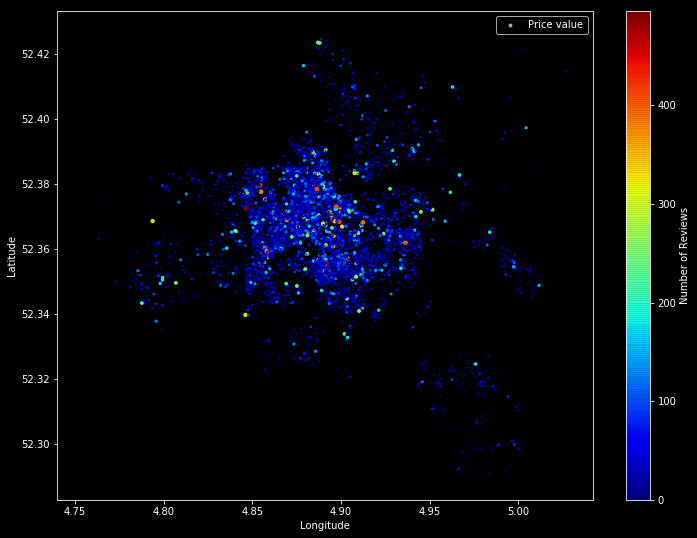

In [42]:
airbnb.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.9,
        s = airbnb['Number of Reviews']/30,label='Price value',figsize=(12,9),
        c = 'Number of Reviews',cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()
plt.show()